In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.shape

(32165, 8)

In [4]:
df_train.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [5]:
df_train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [6]:
df_train.describe(include='all')

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
count,32165.000000,32165,32165,32165,32165.000000,32165,32165.000000,32165.000000
unique,NaN,2220,636,30121,NaN,3537,NaN,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,18-Apr-17,NaN,NaN
freq,NaN,724,5795,8,NaN,37,NaN,NaN
mean,115487.511052,NaN,NaN,NaN,6.998912,NaN,27.893207,6.664261
std,67146.156602,NaN,NaN,NaN,3.274781,NaN,35.819035,1.588699
min,9.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.899076
25%,56922.000000,NaN,NaN,NaN,5.000000,NaN,6.000000,6.109307
50%,115776.000000,NaN,NaN,NaN,8.000000,NaN,16.000000,6.788245
75%,173562.000000,NaN,NaN,NaN,10.000000,NaN,36.000000,7.900790


In [7]:
df_train.dtypes

patient_id                      int64
name_of_drug                   object
use_case_for_drug              object
review_by_patient              object
effectiveness_rating            int64
drug_approved_by_UIC           object
number_of_times_prescribed      int64
base_score                    float64
dtype: object

# Checking for nulls or missing values

In [9]:
df_train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

# checking for outliers

<AxesSubplot:>

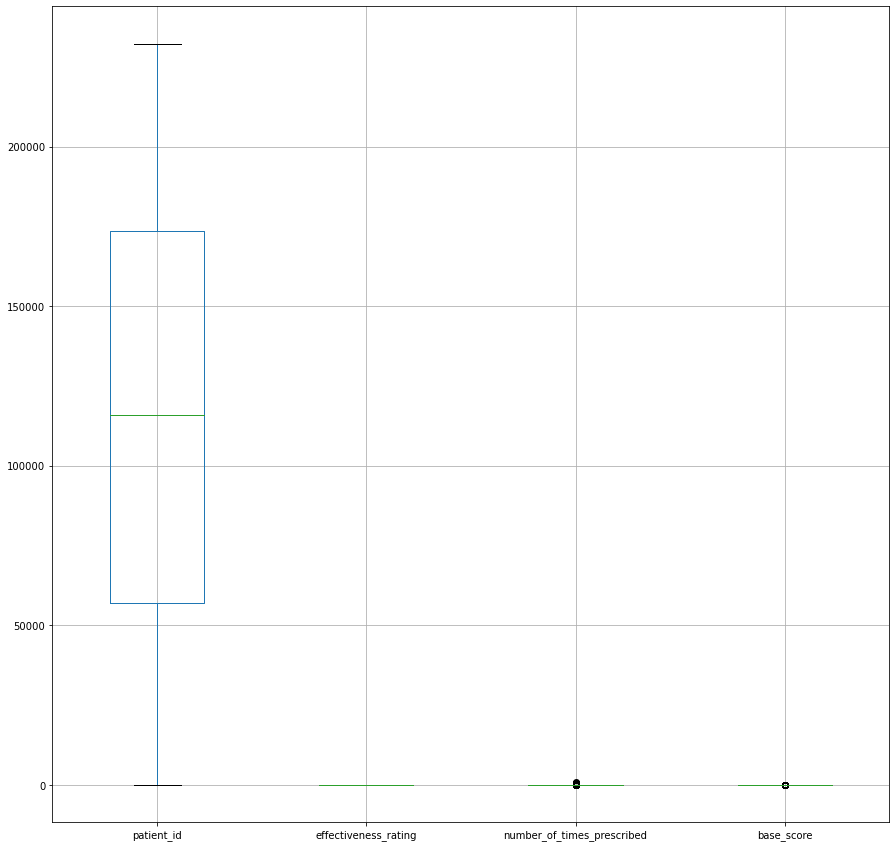

In [11]:
plt.figure(figsize=(15,15))
df_train.boxplot()

# checking for duplicates

In [13]:
df_train.duplicated().sum()

0

In [14]:
# since there are no duplicates and patient id  doesnt play any significant role in prediction this
# feature is dropped

In [15]:
df_train=df_train.drop('patient_id',axis=1)

In [16]:
df_train.head(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [17]:
# checking for outliers

<AxesSubplot:>

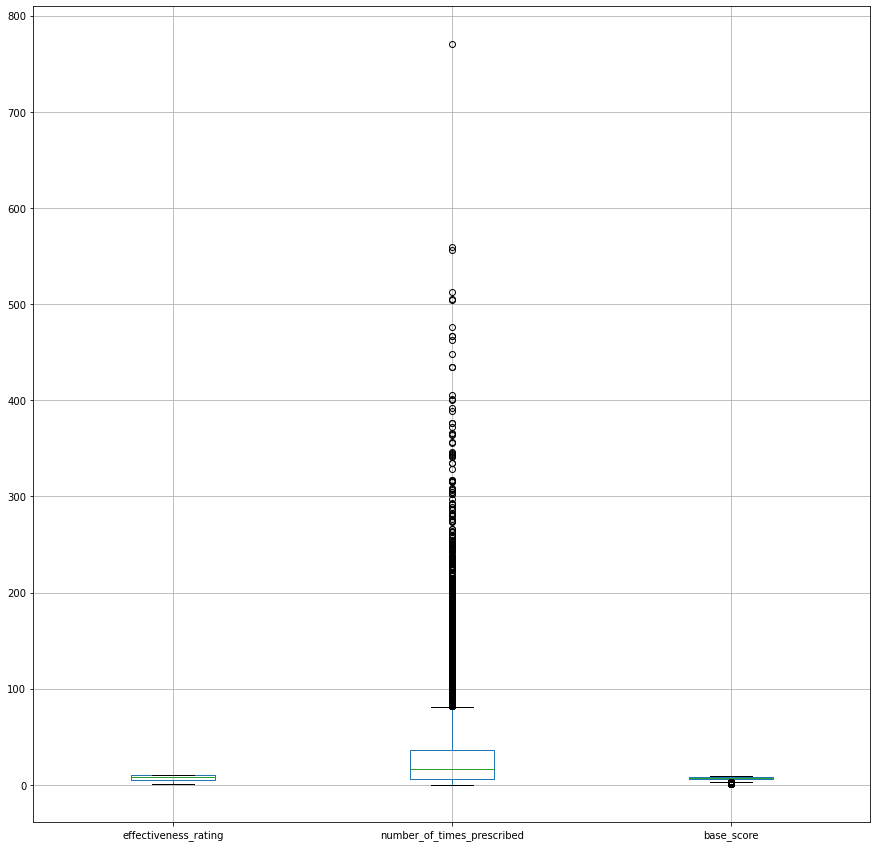

In [18]:
plt.figure(figsize=(15,15))
df_train.boxplot()

# checking for different  types of values in each feature

In [20]:
for col in df_train.columns:
    print(df_train[col].value_counts())


Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Ephedrine / guaifenesin                1
Xalkori                                1
Methscopolamine                        1
Brimonidine / timolol                  1
Didrex                                 1
Name: name_of_drug, Length: 2220, dtype: int64
Birth Control                                    5795
Depression                                       1791
Pain                                             1273
Anxiety                                          1174
Acne                                             1101
                                                 ... 
amilial Mediterranean Feve                          1
Pre-Exposure Prophylaxis                            1
Oligospermia                                        1
Mycobacterium av

In [21]:
df_train.nunique()

name_of_drug                   2220
use_case_for_drug               636
review_by_patient             30121
effectiveness_rating             10
drug_approved_by_UIC           3537
number_of_times_prescribed      303
base_score                     1383
dtype: int64

# Converting timestamp to its respective day month and year

In [22]:
df_train['drug_approved_by_UIC'] =  pd.to_datetime(df_train['drug_approved_by_UIC']) 

df_train['day']=df_train['drug_approved_by_UIC'].dt.day

df_train['month']=df_train['drug_approved_by_UIC'].dt.month

df_train['year']=df_train['drug_approved_by_UIC'].dt.year

In [ ]:
pip install category_encoders

In [24]:
#pd.concat([encoder.fit_transform(df_train['name_of_drug']),df_train], axis =1).sample(15)

# Natural Language Text Preprocessing

# Lowering the texts 

In [25]:
df_train.head(2)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,day,month,year
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,20,5,2012
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,27,4,2010


In [26]:
df_train['name_of_drug']=df_train['name_of_drug'].str.lower().str.replace('/','or')

In [27]:
df_train['use_case_for_drug']=df_train['use_case_for_drug'].str.lower()

In [28]:
df_train['review_by_patient']=df_train['review_by_patient'].str.lower()

# removing html tags if present any 

In [29]:
import re as re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [30]:
df_train['review_by_patient']=df_train['review_by_patient'].apply(remove_html)

# removing url tags if present any

In [31]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www.\.\S+')
    return pattern.sub(r'',text)

In [32]:
df_train['review_by_patient']=df_train['review_by_patient'].apply(remove_url)

# removing punctuations if any 

In [33]:
import string
exclude = string.punctuation

In [34]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [35]:
df_train['review_by_patient']=df_train['review_by_patient'].apply(remove_punc)

In [36]:
# randomly I picked 32161th row to see how it is spelled 
# to my surprise there are lot of spelling errors 
# therefore next step is to correct these spelling mistakes

In [37]:
print(df_train.iloc[32161,2])

i have had the nexplanon since dec 27 2016 

i got my first period at the end of january and it lasted about a month and a half in march of 2017 i didn039t bleed for close to three weeks and then started bleeding again march 28th and have been bleeding every since i have gained about 13 lbs so far since getting the birth control although for now the weight gain isn039t a deal breaker for me but the bleeding is  i am trying to be very patient to see how my body adjusts to the implant it has been three months so far and i have my fingers crossed that my cycle will go away for awhile


In [44]:
import re
for i in range(0,len(df_train)):
    str=re.findall("[a-zA-Z,.]+",df_train.iloc[i,2])
    df_train.iloc[i,2]=(" ".join(str))
print(df_train.iloc[i,2])

limited improvement after months developed bad rash and md refused to continue medication


In [45]:
print(df_train['review_by_patient'])

0        it has no side effect i take it in combination...
1        my son is halfway through his fourth week of i...
2        i used to take another oral contraceptive whic...
3        suboxone has completely turned my life around ...
4        nd day on mg started to work with rock hard er...
                               ...                        
32160    i have been taking cymbalta for months now fir...
32161    i have had the nexplanon since dec i got my fi...
32162    had panic attacks and social anxiety starting ...
32163    i have been off prozac for about weeks nowafte...
32164    limited improvement after months developed bad...
Name: review_by_patient, Length: 32165, dtype: object


# Removing Stop words 

In [47]:
from nltk.corpus import stopwords

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Darshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
def remove_stopwords(text):
    new_text=[]
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    
    return " ".join(x)

In [51]:
df_train['review_by_patient']=df_train['review_by_patient'].apply(remove_stopwords)

In [ ]:
#sw_list= stopwords.words('english')

# removing emojis if present any 

In [52]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [53]:
df_train['review_by_patient']= df_train['review_by_patient'].apply(remove_emoji)

In [54]:
df_train['review_by_patient']

0           side effect  take   combination  bystolic m...
1         son  halfway   fourth week  intuniv  became c...
2         used  take another oral contraceptive   pill ...
3        suboxone  completely turned  life around  feel...
4        nd day  mg started  work  rock hard erections ...
                               ...                        
32160       taking cymbalta  months  first mg   six mon...
32161        nexplanon since dec  got  first period   e...
32162     panic attacks  social anxiety starting  adole...
32163        prozac   weeks nowafter starting years ago...
32164    limited improvement  months developed bad rash...
Name: review_by_patient, Length: 32165, dtype: object

In [84]:
df_train

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,day,month,year
0,valsartan,left ventricular dysfunction,side effect take combination bystolic m...,9,2012-05-20,27,8.022969,20,5,2012
1,guanfacine,adhd,son halfway fourth week intuniv became c...,8,2010-04-27,192,7.858458,27,4,2010
2,lybrel,birth control,used take another oral contraceptive pill ...,5,2009-12-14,17,6.341969,14,12,2009
3,buprenorphine or naloxone,opiate dependence,suboxone completely turned life around feel...,9,2016-11-27,37,6.590176,27,11,2016
4,cialis,benign prostatic hyperplasia,nd day mg started work rock hard erections ...,2,2015-11-28,43,6.144782,28,11,2015
...,...,...,...,...,...,...,...,...,...,...
32160,cymbalta,anxiety,taking cymbalta months first mg six mon...,9,2013-06-10,89,6.963020,10,6,2013
32161,nexplanon,birth control,nexplanon since dec got first period e...,6,2017-04-06,0,0.899076,6,4,2017
32162,venlafaxine,panic disorde,panic attacks social anxiety starting adole...,9,2016-11-10,25,6.241812,10,11,2016
32163,fluoxetine,obsessive compulsive disorde,prozac weeks nowafter starting years ago...,8,2015-01-21,22,7.940428,21,1,2015


In [85]:
df_tf=df_train

# TF-IDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tf_idf= TfidfVectorizer()

In [89]:
df_tf['review_by_patient']=tf_idf.fit_transform(df_tf['review_by_patient']).toarray()

In [ ]:
#df_tf['day']=df_tf['drug_approved_by_UIC'].dt.day

In [ ]:
#df_tf['month']=df_tf['drug_approved_by_UIC'].dt.month

In [ ]:
#df_tf['year']=df_tf['drug_approved_by_UIC'].dt.year

In [ ]:
df_tf['use_case_for_drug'].value_counts()

In [96]:
df_tf.drop('drug_approved_by_UIC',axis=1,inplace=True)

In [ ]:
#df_tf.drop('drug_approved_by_UIC',axis=1,inplace=True)

In [90]:
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [91]:
from sklearn.preprocessing import LabelEncoder

ll=LabelEncoder()

df_train['name_of_drug'] = ll.fit_transform(df_train['name_of_drug'])

df_train['use_case_for_drug']= ll.fit_transform(df_train['use_case_for_drug'])

<AxesSubplot:>

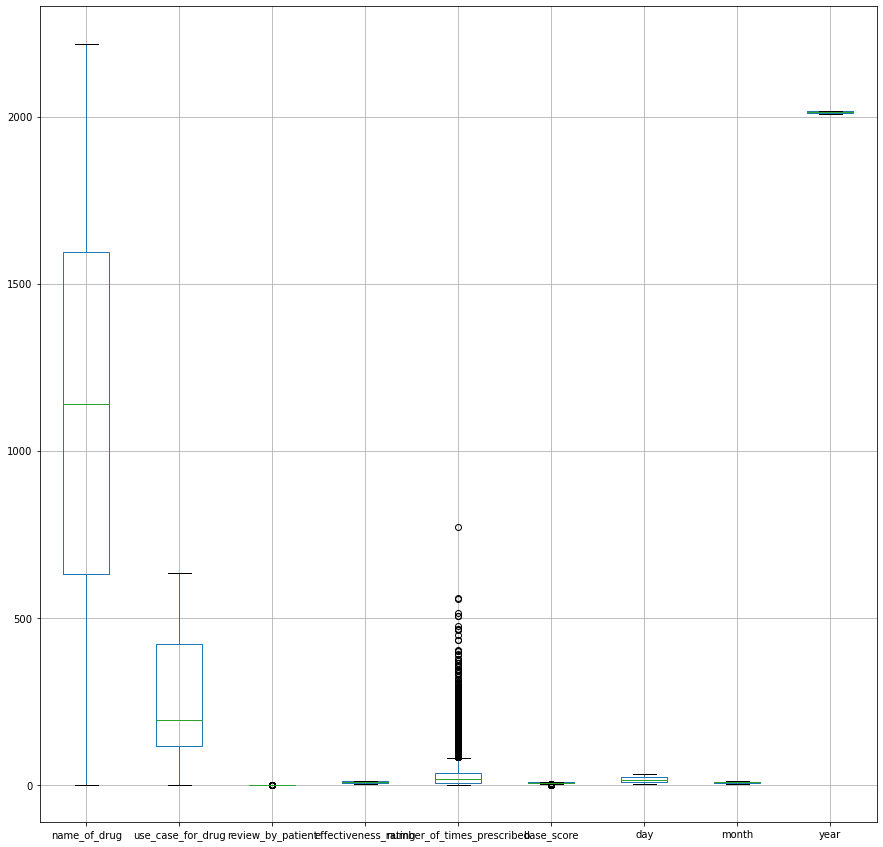

In [92]:
plt.figure(figsize=(15,15))

df_tf.boxplot()

# The box plot shows there are many outliers . Using IQR method these outliers are removed

In [97]:
Q1 = df_tf.quantile(0.25)

Q3 = df_tf.quantile(0.75)

IQR = Q3 - Q1



df_tf=df_tf[~((df_tf < (Q1 - 1.5 * IQR)) | (df_tf > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_tf.shape

(28256, 9)

In [98]:
x=df_tf.drop('base_score',axis=1)

y=df_tf['base_score']

<AxesSubplot:>

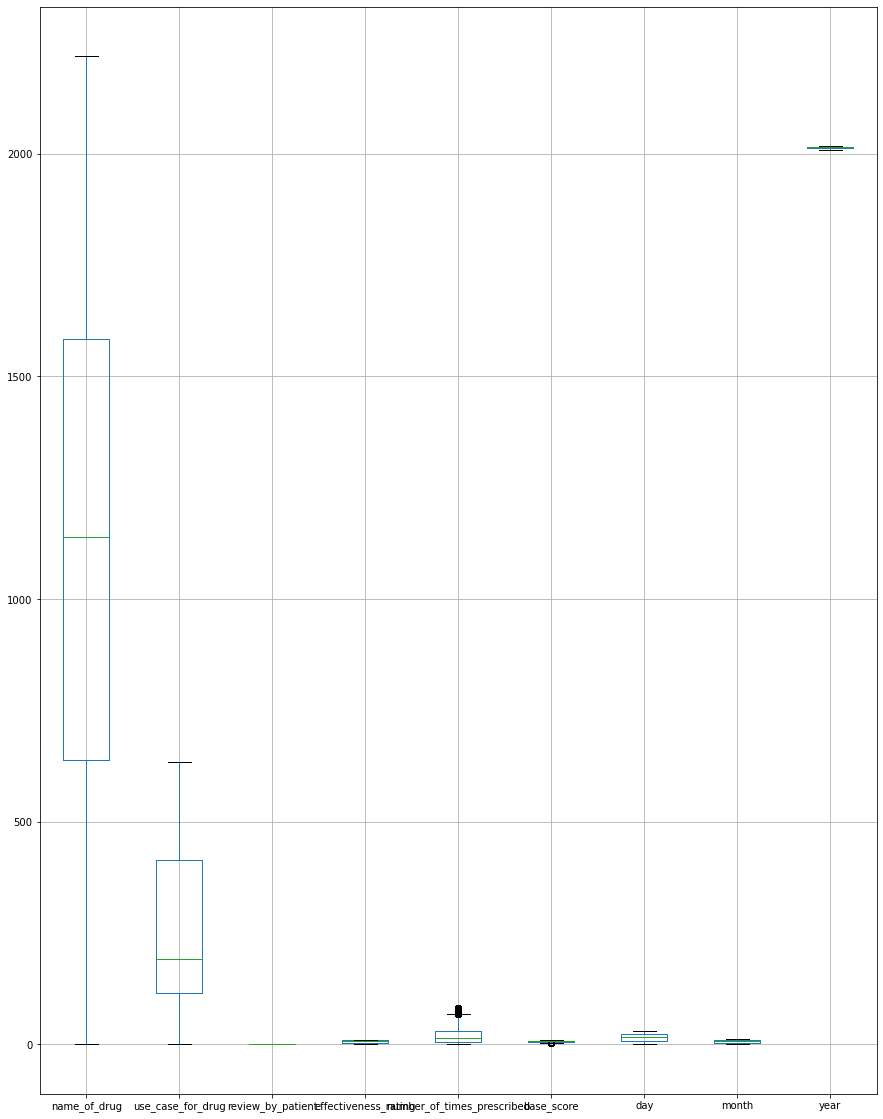

In [99]:
plt.figure(figsize=(15,20))
df_tf.boxplot()

In [100]:
x.shape ,y.shape

((28256, 8), (28256,))

In [101]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(x,y, 
                                                    random_state=10, test_size = 0.3)


print('X_train_tf', X_train_tf.shape)
print('y_train_tf', y_train_tf.shape)

# print dimension of test set
print('X_test_tf', X_test_tf.shape)
print('y_test_tf', y_test_tf.shape)

X_train_tf (19779, 8)
y_train_tf (19779,)
X_test_tf (8477, 8)
y_test_tf (8477,)


In [102]:
SLR_model = sm.OLS(y_train_tf, X_train_tf).fit()

# print the summary output
print(SLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:             base_score   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          9.162e+04
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                        0.00
Time:                        18:14:11   Log-Likelihood:                         -31802.
No. Observations:               19779   AIC:                                  6.362e+04
Df Residuals:                   19772   BIC:                                  6.367e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [103]:
y_train_tf_pred = SLR_model.predict(X_train_tf)

# display the first five predicted values 
y_train_tf_pred.head()

13322    7.299555
28381    6.984092
14676    7.114217
8975     7.322018
27576    7.143426
dtype: float64

In [104]:
ssr = np.sum((y_train_tf_pred - y_train_tf.mean())**2)
ssr

4987.347445063393

<AxesSubplot:>

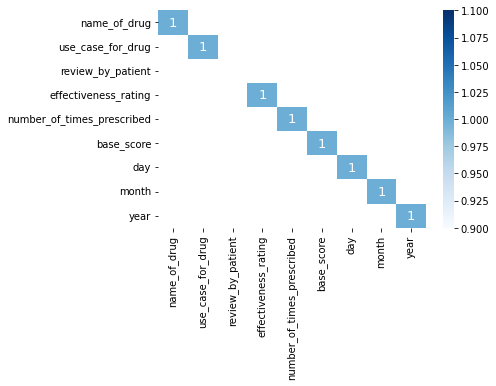

In [105]:
sns.heatmap(df_tf.corr()[np.abs(df_tf.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')


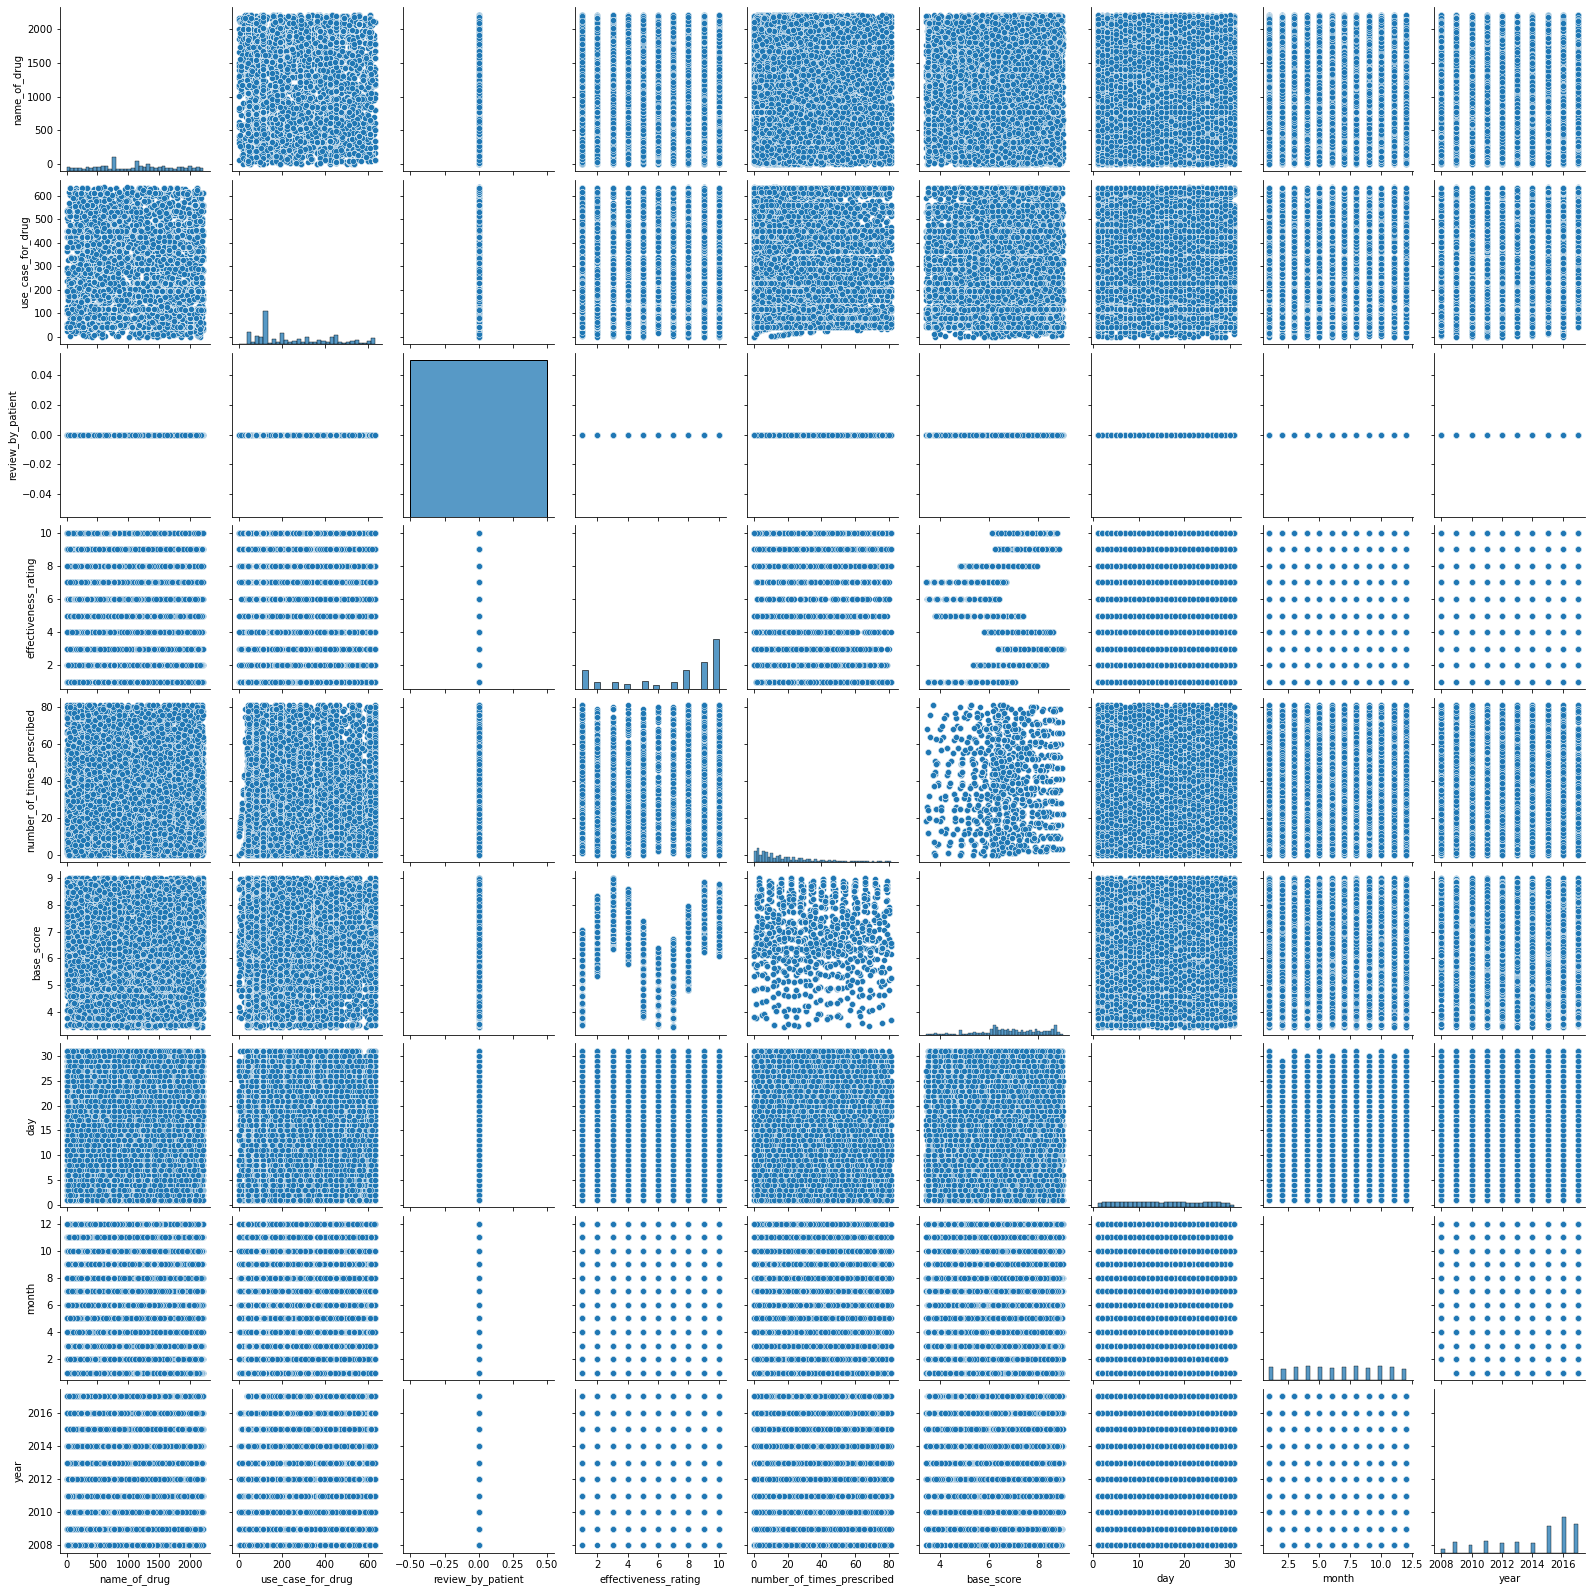

In [106]:
sns.pairplot(df_tf)

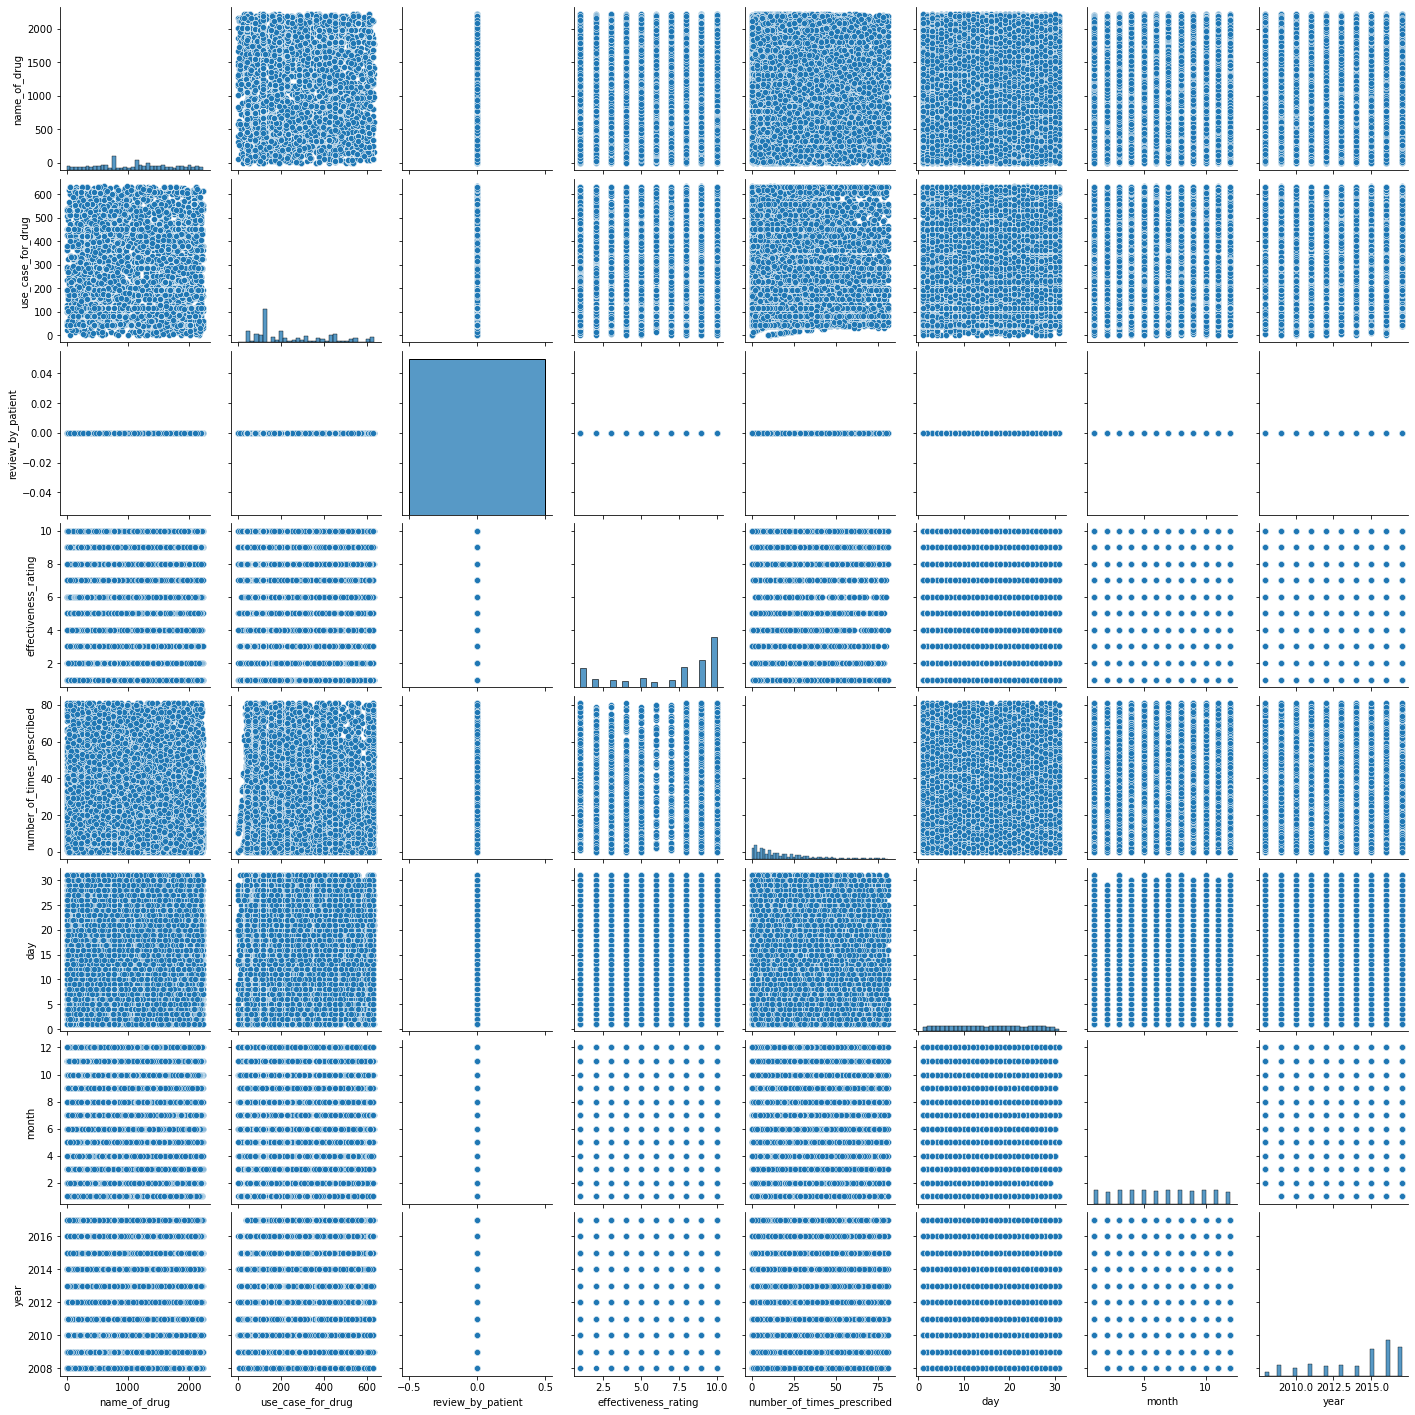

In [107]:
sns.pairplot(x)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [109]:
dec_reg = DecisionTreeRegressor(random_state = 10)

# fit the model using fit() on train data
decision_tree = dec_reg.fit(X_train_tf, y_train_tf)

In [110]:
y_train_tf_dec_pred = decision_tree.predict(X_train_tf)
y_train_tf_dec_pred

array([8.65679674, 6.12405725, 6.29083469, ..., 7.94285424, 6.47618315,
       6.36191724])

In [111]:
sse = np.sum((y_train_tf - y_train_tf_dec_pred)**2)
sse
sst = np.sum((y_train_tf - y_train_tf.mean())**2)
sst
ssr = np.sum((y_train_tf_dec_pred - y_train_tf.mean())**2)
ssr

33843.19987220055

In [112]:
r_sq = ssr/sst

# the R-squared value
r_sq

0.9999999999999996

In [113]:
ran_reg = RandomForestRegressor(random_state = 10)

# fit the model using fit() on train data
random_tree = ran_reg.fit(X_train_tf, y_train_tf)

y_train_tf_ran_pred = random_tree.predict(X_train_tf)
y_train_tf_ran_pred

sse = np.sum((y_train_tf - y_train_tf_ran_pred)**2)
sse
sst = np.sum((y_train_tf - y_train_tf.mean())**2)
sst
ssr = np.sum((y_train_tf_ran_pred - y_train_tf.mean())**2)
ssr

r_sq = ssr/sst

# print the R-squared value
r_sq

0.9908126334877684

# Predicting the values for the test data

In [114]:
df_test=pd.read_csv('test.csv')

In [115]:
df_test

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2
...,...,...,...,...,...,...,...
10755,151266,Chantix,"""I took chantix a little over a month. It made...",11-Nov-17,2,Smoking Cessation,1
10756,139347,Armodafinil,"""This medicine kept me from sleeping the whole...",30-Sep-14,18,Narcolepsy,1
10757,159999,Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",13-Sep-14,43,"Breast Cancer, Prevention",10
10758,130945,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",15-Nov-10,7,Birth Control,8


# Test Data

In [117]:
df_test.drop('patient_id',axis=1,inplace=True)

In [118]:
df_test.isnull().sum()

name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

In [122]:
df_test.duplicated().sum()

0

In [123]:
df_test['drug_approved_by_UIC'] =  pd.to_datetime(df_test['drug_approved_by_UIC']) 

df_test['day']=df_test['drug_approved_by_UIC'].dt.day

df_test['month']=df_test['drug_approved_by_UIC'].dt.month

df_test['year']=df_test['drug_approved_by_UIC'].dt.year

In [125]:
df_test.drop('drug_approved_by_UIC',axis=1,inplace=True)

In [126]:
df_test

,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,day,month,year
0,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",22,Depression,10,28,2,2012
1,Contrave,"""Contrave combines drugs that were used for al...",35,Weight Loss,9,5,3,2017
2,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",13,Keratosis,4,3,7,2014
3,Methadone,"""Ive been on Methadone for over ten years and ...",21,Opiate Withdrawal,7,18,10,2016
4,Ambien,"""Ditto on rebound sleepless when discontinued....",44,Insomnia,2,13,1,2015
...,...,...,...,...,...,...,...,...
10755,Chantix,"""I took chantix a little over a month. It made...",2,Smoking Cessation,1,11,11,2017
10756,Armodafinil,"""This medicine kept me from sleeping the whole...",18,Narcolepsy,1,30,9,2014
10757,Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",43,"Breast Cancer, Prevention",10,13,9,2014
10758,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",7,Birth Control,8,15,11,2010


In [127]:
df_test['name_of_drug']=df_test['name_of_drug'].str.lower().str.replace('/','or')

df_test['use_case_for_drug']=df_test['use_case_for_drug'].str.lower()

df_test['review_by_patient']=df_test['review_by_patient'].str.lower()



In [129]:
import re as re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

df_test['review_by_patient']=df_test['review_by_patient'].apply(remove_html)




In [130]:
# removing url's 

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www.\.\S+')
    return pattern.sub(r'',text)

df_test['review_by_patient']=df_test['review_by_patient'].apply(remove_url)



In [133]:
# removing punctuations if any 

import string
exclude = string.punctuation



In [134]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
df_test['review_by_patient']=df_test['review_by_patient'].apply(remove_punc)

In [136]:


import re
for i in range(0,len(df_test)):
    str=re.findall("[a-zA-Z,.]+",df_test.iloc[i,1])
    df_test.iloc[i,1]=(" ".join(str))
print(df_test.iloc[i,1])

it works


In [137]:
def remove_stopwords(text):
    new_text=[]
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    
    return " ".join(x)


In [138]:
df_test['review_by_patient']=df_test['review_by_patient'].apply(remove_stopwords)

In [139]:
# removing emojis if present any 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [140]:
df_test['review_by_patient']= df_test['review_by_patient'].apply(remove_emoji)

In [141]:
df_test['review_by_patient']=tf_idf.fit_transform(df_test['review_by_patient']).toarray()



In [142]:
from sklearn.preprocessing import LabelEncoder

ll=LabelEncoder()

df_test['name_of_drug'] = ll.fit_transform(df_test['name_of_drug'])

df_test['use_case_for_drug']= ll.fit_transform(df_test['use_case_for_drug'])

In [143]:
df_test

,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,day,month,year
0,856,0.0,22,133,10,28,2,2012
1,311,0.0,35,457,9,5,3,2017
2,1474,0.0,13,249,4,3,7,2014
3,823,0.0,21,315,7,18,10,2016
4,66,0.0,44,239,2,13,1,2015
...,...,...,...,...,...,...,...,...
10755,253,0.0,2,408,1,11,11,2017
10756,106,0.0,18,291,1,30,9,2014
10757,1258,0.0,43,90,10,13,9,2014
10758,728,0.0,7,80,8,15,11,2010


In [145]:
result = random_tree.predict(df_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [177]:
res=pd.DataFrame(data=result,columns=['Results'])

In [182]:
r1=res.reset_index(drop=True)

In [184]:
df2=df_test.reset_index(drop=True)

In [187]:
final_ans=pd.concat([df2,r1],axis=1)

In [190]:
final_ans

,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,day,month,year,Results
0,856,0.0,22,133,10,28,2,2012,8.574486
1,311,0.0,35,457,9,5,3,2017,8.656797
2,1474,0.0,13,249,4,3,7,2014,8.358951
3,823,0.0,21,315,7,18,10,2016,6.493653
4,66,0.0,44,239,2,13,1,2015,8.074493
...,...,...,...,...,...,...,...,...,...
10755,253,0.0,2,408,1,11,11,2017,6.809684
10756,106,0.0,18,291,1,30,9,2014,6.809684
10757,1258,0.0,43,90,10,13,9,2014,8.574486
10758,728,0.0,7,80,8,15,11,2010,7.737593


In [191]:
from collections import defaultdict
encoder = defaultdict(LabelEncoder)



In [195]:
final_ans['use_case_for_drug']=ll.inverse_transform(df_test['use_case_for_drug'])

In [196]:
final_ans

,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,day,month,year,Results
0,856,0.0,22,depression,10,28,2,2012,8.574486
1,311,0.0,35,weight loss,9,5,3,2017,8.656797
2,1474,0.0,13,keratosis,4,3,7,2014,8.358951
3,823,0.0,21,opiate withdrawal,7,18,10,2016,6.493653
4,66,0.0,44,insomnia,2,13,1,2015,8.074493
...,...,...,...,...,...,...,...,...,...
10755,253,0.0,2,smoking cessation,1,11,11,2017,6.809684
10756,106,0.0,18,narcolepsy,1,30,9,2014,6.809684
10757,1258,0.0,43,"breast cancer, prevention",10,13,9,2014,8.574486
10758,728,0.0,7,birth control,8,15,11,2010,7.737593


In [199]:
dfq=pd.read_csv('test.csv')

In [202]:
bw=ll.fit_transform(dfq['name_of_drug'])

In [205]:
bw1=ll.inverse_transform(bw)

In [209]:
bw1=pd.DataFrame(bw1,columns=['name_of_drug'])

In [213]:
final_ans['name_of_drug']=bw1

In [214]:
final_ans

,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,day,month,year,Results
0,Mirtazapine,0.0,22,depression,10,28,2,2012,8.574486
1,Contrave,0.0,35,weight loss,9,5,3,2017,8.656797
2,Zyclara,0.0,13,keratosis,4,3,7,2014,8.358951
3,Methadone,0.0,21,opiate withdrawal,7,18,10,2016,6.493653
4,Ambien,0.0,44,insomnia,2,13,1,2015,8.074493
...,...,...,...,...,...,...,...,...,...
10755,Chantix,0.0,2,smoking cessation,1,11,11,2017,6.809684
10756,Armodafinil,0.0,18,narcolepsy,1,30,9,2014,6.809684
10757,Tamoxifen,0.0,43,"breast cancer, prevention",10,13,9,2014,8.574486
10758,Levonorgestrel,0.0,7,birth control,8,15,11,2010,7.737593
